In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Cars ML Project/final_features_081023.pkl')
df.head()

,Car_weight(kg),Engine_cap(cc),Brake_hp,Car_age,num_owners,trans_type,curr_COE_days_left,car_type,car_brand,Car_price
0,-0.275653,-0.605810,0.934156,0.997713,0.232536,-0.440436,-1.609840,-1.341027,-1.046059,3600
1,0.134345,0.728844,1.928689,0.997713,0.232536,-0.440436,-1.306694,-0.944938,-0.912679,9800
2,-0.130170,-0.039551,0.110115,0.997713,2.928313,-0.440436,-1.543148,-0.548848,-0.912679,4388
3,-0.330445,-0.327527,-0.401359,0.783900,0.232536,-0.440436,-1.371365,-0.152758,-0.779299,6700
4,-0.101829,-0.039551,0.110115,0.997713,1.580425,-0.440436,-1.526980,-0.548848,-0.912679,4388


In [ ]:
# Train-test split: 80% train, 20% test
X = df.drop(columns=['Car_price'])
y = df["Car_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2756, 9)
y_train shape: (2756,)
X_test shape: (690, 9)
y_test shape: (690,)


## Model Bank
- Decision Tree
- Random forest
- XGBoost Decision Tree
- XGBoost Random Forest

# Function Bank

In [ ]:
#Get initial model
def initial_model(regressor, X_train, y_train):
  model = regressor
  model.fit(X_train, y_train)
  return model


#Prints the models accuracy
def model_accuracy(model, X_test, y_test):
  y_preds = model.predict(X_test)
  MAE = mean_absolute_error(y_test, y_preds)
  R2 = r2_score(y_test, y_preds)
  MAPE = mean_absolute_percentage_error(y_test, y_preds)
  print(str(model) + '\nPerformance:')
  print(f'MAE: {round(MAE,2)}')
  print(f'R2: {round(R2, 4) * 100}')
  print(f'MAPE: {round(MAPE * 100,2)}%')

#Uses GridSearchCV and returns model with the best parameters already fitted
def best_grid_model(regressor, params, X_train, y_train):
  initial_model = regressor
  model = GridSearchCV(initial_model, params, refit=True, verbose=3)
  model.fit(X_train, y_train)
  print('Best Parameters for ' + str(regressor) + ': '+ str(model.best_params_))
  return model


#Uses RandomizedSearchCV and returns model with the best parameters already fitted
def best_random_model(regressor, params, X_train, y_train):
  initial_model = regressor
  model = RandomizedSearchCV(initial_model, params, refit=True, verbose=3)
  model.fit(X_train, y_train)
  print('Best Parameters for ' + str(regressor) + ': '+ str(model.best_params_))
  return model

# Show difference between untuned and tuned
def show_upgrade(model_1, model_2):
  print('Initial Model performance:')
  print('-------------------')
  model_accuracy(model_1, X_test,y_test)
  print()
  print('Model performance fter Hyperparameter Tuning:')
  print('-------------------')
  model_accuracy(model_2, X_test,y_test)

# Decision Tree Model

In [ ]:
DTR_model = initial_model(DecisionTreeRegressor(), X_train, y_train)
model_accuracy(DTR_model, X_test, y_test)

DecisionTreeRegressor()
Performance:
MAE: 4073.29
R2: 83.8
MAPE: 13.21%


## Decision Tree Hyperparameter Tuning

In [ ]:
params = {
    'max_depth': [200, 400, 600, 800, 1000],
    'max_leaf_nodes': [1000, 1250, 1500, 1750, 2000],
    'min_samples_split':[8,10,12,18,20,16],
}

best_DTR_model = best_grid_model(DTR_model, params, X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=200, max_leaf_nodes=1000, min_samples_split=8;, score=0.830 total time=   0.0s
[CV 2/5] END max_depth=200, max_leaf_nodes=1000, min_samples_split=8;, score=0.830 total time=   0.0s
[CV 3/5] END max_depth=200, max_leaf_nodes=1000, min_samples_split=8;, score=0.785 total time=   0.0s
[CV 4/5] END max_depth=200, max_leaf_nodes=1000, min_samples_split=8;, score=0.797 total time=   0.0s
[CV 5/5] END max_depth=200, max_leaf_nodes=1000, min_samples_split=8;, score=0.807 total time=   0.0s
[CV 1/5] END max_depth=200, max_leaf_nodes=1000, min_samples_split=10;, score=0.836 total time=   0.0s
[CV 2/5] END max_depth=200, max_leaf_nodes=1000, min_samples_split=10;, score=0.834 total time=   0.0s
[CV 3/5] END max_depth=200, max_leaf_nodes=1000, min_samples_split=10;, score=0.788 total time=   0.0s
[CV 4/5] END max_depth=200, max_leaf_nodes=1000, min_samples_split=10;, score=0.799 total time=   0.0s
[CV 5/5] END ma

In [ ]:
params_2 = {
    'max_depth': [100,150,200,250,300],
    'max_leaf_nodes': [1000, 1250, 1500, 1750, 2000],
    'min_samples_split':[12,14,16,18,20,22],
}

best_DTR_model = best_grid_model(DTR_model, params_2, X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=100, max_leaf_nodes=1000, min_samples_split=12;, score=0.842 total time=   0.1s
[CV 2/5] END max_depth=100, max_leaf_nodes=1000, min_samples_split=12;, score=0.840 total time=   0.0s
[CV 3/5] END max_depth=100, max_leaf_nodes=1000, min_samples_split=12;, score=0.764 total time=   0.0s
[CV 4/5] END max_depth=100, max_leaf_nodes=1000, min_samples_split=12;, score=0.808 total time=   0.1s
[CV 5/5] END max_depth=100, max_leaf_nodes=1000, min_samples_split=12;, score=0.809 total time=   0.0s
[CV 1/5] END max_depth=100, max_leaf_nodes=1000, min_samples_split=14;, score=0.837 total time=   0.0s
[CV 2/5] END max_depth=100, max_leaf_nodes=1000, min_samples_split=14;, score=0.832 total time=   0.0s
[CV 3/5] END max_depth=100, max_leaf_nodes=1000, min_samples_split=14;, score=0.792 total time=   0.0s
[CV 4/5] END max_depth=100, max_leaf_nodes=1000, min_samples_split=14;, score=0.810 total time=   0.1s
[CV 5/5] E

In [ ]:
params_3 = {
    'max_depth': [230,240,250,260,270],
    'max_leaf_nodes': [1000, 1250, 1500, 1750, 2000],
    'min_samples_split':[16,18,20,22],
}

best_DTR_model = best_grid_model(DTR_model, params_3, X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END max_depth=230, max_leaf_nodes=1000, min_samples_split=16;, score=0.840 total time=   0.0s
[CV 2/5] END max_depth=230, max_leaf_nodes=1000, min_samples_split=16;, score=0.838 total time=   0.0s
[CV 3/5] END max_depth=230, max_leaf_nodes=1000, min_samples_split=16;, score=0.786 total time=   0.0s
[CV 4/5] END max_depth=230, max_leaf_nodes=1000, min_samples_split=16;, score=0.803 total time=   0.0s
[CV 5/5] END max_depth=230, max_leaf_nodes=1000, min_samples_split=16;, score=0.811 total time=   0.0s
[CV 1/5] END max_depth=230, max_leaf_nodes=1000, min_samples_split=18;, score=0.840 total time=   0.0s
[CV 2/5] END max_depth=230, max_leaf_nodes=1000, min_samples_split=18;, score=0.854 total time=   0.0s
[CV 3/5] END max_depth=230, max_leaf_nodes=1000, min_samples_split=18;, score=0.774 total time=   0.0s
[CV 4/5] END max_depth=230, max_leaf_nodes=1000, min_samples_split=18;, score=0.809 total time=   0.0s
[CV 5/5] E

In [ ]:
params_4 = {
    'max_depth': [230,240,250,260,270],
    'max_leaf_nodes': [1650, 1700, 1750, 1800, 1850],
    'min_samples_split':[16,18,20,22],
}

best_DTR_model = best_grid_model(DTR_model, params_4, X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END max_depth=230, max_leaf_nodes=1650, min_samples_split=16;, score=0.836 total time=   0.0s
[CV 2/5] END max_depth=230, max_leaf_nodes=1650, min_samples_split=16;, score=0.838 total time=   0.0s
[CV 3/5] END max_depth=230, max_leaf_nodes=1650, min_samples_split=16;, score=0.775 total time=   0.0s
[CV 4/5] END max_depth=230, max_leaf_nodes=1650, min_samples_split=16;, score=0.803 total time=   0.1s
[CV 5/5] END max_depth=230, max_leaf_nodes=1650, min_samples_split=16;, score=0.811 total time=   0.0s
[CV 1/5] END max_depth=230, max_leaf_nodes=1650, min_samples_split=18;, score=0.836 total time=   0.0s
[CV 2/5] END max_depth=230, max_leaf_nodes=1650, min_samples_split=18;, score=0.854 total time=   0.0s
[CV 3/5] END max_depth=230, max_leaf_nodes=1650, min_samples_split=18;, score=0.774 total time=   0.0s
[CV 4/5] END max_depth=230, max_leaf_nodes=1650, min_samples_split=18;, score=0.809 total time=   0.0s
[CV 5/5] E

In [ ]:
best_params = best_DTR_model.best_params_

In [ ]:
best_DTR_model = DecisionTreeRegressor(max_depth = best_params['max_depth'],
                                       max_leaf_nodes = best_params['max_leaf_nodes'],
                                       min_samples_split = best_params['min_samples_split']
                                      )
best_DTR_model.fit(X_train,y_train)
model_accuracy(best_DTR_model, X_test,y_test)

DecisionTreeRegressor(max_depth=240, max_leaf_nodes=1850, min_samples_split=18)
Performance:
MAE: 3998.41
R2: 84.84
MAPE: 12.93%


In [ ]:
show_upgrade(DTR_model, best_DTR_model)

Initial Model performance:
-------------------
DecisionTreeRegressor()
Performance:
MAE: 4073.29
R2: 83.8
MAPE: 13.21%

Model performance fter Hyperparameter Tuning:
-------------------
DecisionTreeRegressor(max_depth=240, max_leaf_nodes=1850, min_samples_split=18)
Performance:
MAE: 3998.41
R2: 84.84
MAPE: 12.93%


# Random Forest Model


In [ ]:
RFR_model = initial_model(RandomForestRegressor(), X_train, y_train)
model_accuracy(RFR_model, X_test, y_test)

RandomForestRegressor()
Performance:
MAE: 3252.36
R2: 89.61
MAPE: 10.61%


## Random Forest Hyperparameter Tuning

In [ ]:
params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

best_RFR_model = best_random_model(RFR_model, params, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400;, score=0.906 total time=   7.6s
[CV 2/5] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400;, score=0.902 total time=   7.1s
[CV 3/5] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400;, score=0.884 total time=   6.8s
[CV 4/5] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400;, score=0.876 total time=   7.8s
[CV 5/5] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400;, score=0.905 total time=   6.4s
[CV 1/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.892 total time=   5.8s
[CV 2/5] EN

In [ ]:
params_2 = {'n_estimators': [900,1000,1100,1200,1300,1400,1500,1600],
               'max_features': ['sqrt'],
               'max_depth': [70,80,90,100,110],
               'min_samples_split': [2,3,4],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

best_RFR_model = best_random_model(RFR_model, params_2, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1500;, score=0.897 total time=   6.2s
[CV 2/5] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1500;, score=0.895 total time=   7.9s
[CV 3/5] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1500;, score=0.873 total time=   8.9s
[CV 4/5] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1500;, score=0.866 total time=   5.9s
[CV 5/5] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1500;, score=0.896 total time=   7.6s
[CV 1/5] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1400;, score=0.910 total time=   7.8s
[CV 

In [ ]:
best_params = best_RFR_model.best_params_

In [ ]:
best_RFR_model = RandomForestRegressor(n_estimators =  best_params['n_estimators'],
                                       max_features = best_params['max_features'],
                                       max_depth = best_params['max_depth'],
                                       min_samples_split = best_params['min_samples_split'],
                                       min_samples_leaf = best_params['min_samples_leaf'],
                                       bootstrap = best_params['bootstrap']
                                      )
best_RFR_model.fit(X_train,y_train)
model_accuracy(best_RFR_model, X_test,y_test)

RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_split=3, n_estimators=1400)
Performance:
MAE: 3210.81
R2: 90.39
MAPE: 11.19%


In [ ]:
show_upgrade(RFR_model, best_RFR_model)

Initial Model performance:
-------------------
RandomForestRegressor()
Performance:
MAE: 3252.36
R2: 89.61
MAPE: 10.61%

Model performance fter Hyperparameter Tuning:
-------------------
RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_split=3, n_estimators=1400)
Performance:
MAE: 3210.81
R2: 90.39
MAPE: 11.19%


# Gradient Boosted Regressor


In [ ]:
XGBR_model = initial_model(XGBRegressor(learning_rate =0.1,
                                        max_depth=5,
                                        min_child_weight=1,
                                        gamma=0,
                                        subsample=0.8,
                                        colsample_bytree=0.8),
                                        X_train,
                                        y_train)
model_accuracy(XGBR_model, X_test, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Performance:
MAE: 3004.56
R2: 91.85
MAPE: 10.01%


## Gradient Boosted Regressor Hyperparameter Tuning

In [ ]:
params_1 = {
 'max_depth':range(3,10),
 'min_child_weight':range(1,6)
}

best_XGBR_model = best_grid_model(XGBR_model, params_1, X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ...max_depth=3, min_child_weight=1;, score=0.881 total time=   0.2s
[CV 2/5] END ...max_depth=3, min_child_weight=1;, score=0.886 total time=   0.2s
[CV 3/5] END ...max_depth=3, min_child_weight=1;, score=0.859 total time=   0.3s
[CV 4/5] END ...max_depth=3, min_child_weight=1;, score=0.863 total time=   0.3s
[CV 5/5] END ...max_depth=3, min_child_weight=1;, score=0.894 total time=   0.1s
[CV 1/5] END ...max_depth=3, min_child_weight=2;, score=0.884 total time=   0.2s
[CV 2/5] END ...max_depth=3, min_child_weight=2;, score=0.888 total time=   0.2s
[CV 3/5] END ...max_depth=3, min_child_weight=2;, score=0.854 total time=   0.1s
[CV 4/5] END ...max_depth=3, min_child_weight=2;, score=0.863 total time=   0.2s
[CV 5/5] END ...max_depth=3, min_child_weight=2;, score=0.892 total time=   0.4s
[CV 1/5] END ...max_depth=3, min_child_weight=3;, score=0.883 total time=   0.4s
[CV 2/5] END ...max_depth=3, min_child_weight=3

In [ ]:
best_params_1 = best_XGBR_model.best_params_
best_XGBR_model = XGBRegressor(learning_rate =0.1,
                          max_depth= best_params_1['max_depth'],
                          min_child_weight= best_params_1['min_child_weight'],
                          gamma=0,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          )
best_XGBR_model.fit(X_train,y_train)
show_upgrade(XGBR_model, best_XGBR_model)

Initial Model performance:
-------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Performance:
MAE: 3004.56
R2: 91.85
MAPE: 10.01%

Model performance fter Hyperparameter Tuning:
-------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, cols

In [ ]:
params_2 = {
 'min_child_weight':[2,4,6,8,10]
}

best_XGBR_model = best_grid_model(XGBR_model, params_2, X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ................min_child_weight=2;, score=0.916 total time=   0.3s
[CV 2/5] END ................min_child_weight=2;, score=0.907 total time=   0.2s
[CV 3/5] END ................min_child_weight=2;, score=0.900 total time=   0.1s
[CV 4/5] END ................min_child_weight=2;, score=0.899 total time=   0.1s
[CV 5/5] END ................min_child_weight=2;, score=0.920 total time=   0.1s
[CV 1/5] END ................min_child_weight=4;, score=0.910 total time=   0.1s
[CV 2/5] END ................min_child_weight=4;, score=0.904 total time=   0.1s
[CV 3/5] END ................min_child_weight=4;, score=0.901 total time=   0.1s
[CV 4/5] END ................min_child_weight=4;, score=0.896 total time=   0.1s
[CV 5/5] END ................min_child_weight=4;, score=0.917 total time=   0.1s
[CV 1/5] END ................min_child_weight=6;, score=0.911 total time=   0.1s
[CV 2/5] END ................min_child_weight=6;,

In [ ]:
best_params_2 = best_XGBR_model.best_params_
best_XGBR_model = XGBRegressor(learning_rate =0.1,
                          max_depth= best_params_1['max_depth'],
                          min_child_weight= best_params_2['min_child_weight'],
                          gamma=0,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          )
best_XGBR_model.fit(X_train,y_train)
show_upgrade(XGBR_model, best_XGBR_model)

Initial Model performance:
-------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Performance:
MAE: 3004.56
R2: 91.85
MAPE: 10.01%

Model performance fter Hyperparameter Tuning:
-------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, cols

In [ ]:
params_3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
best_XGBR_model = best_grid_model(XGBR_model, params_3, X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .........................gamma=0.0;, score=0.913 total time=   0.1s
[CV 2/5] END .........................gamma=0.0;, score=0.908 total time=   0.1s
[CV 3/5] END .........................gamma=0.0;, score=0.899 total time=   0.1s
[CV 4/5] END .........................gamma=0.0;, score=0.897 total time=   0.1s
[CV 5/5] END .........................gamma=0.0;, score=0.918 total time=   0.1s
[CV 1/5] END .........................gamma=0.1;, score=0.913 total time=   0.1s
[CV 2/5] END .........................gamma=0.1;, score=0.908 total time=   0.1s
[CV 3/5] END .........................gamma=0.1;, score=0.899 total time=   0.1s
[CV 4/5] END .........................gamma=0.1;, score=0.897 total time=   0.1s
[CV 5/5] END .........................gamma=0.1;, score=0.918 total time=   0.1s
[CV 1/5] END .........................gamma=0.2;, score=0.913 total time=   0.1s
[CV 2/5] END .........................gamma=0.2;,

In [ ]:
best_params_3 = best_XGBR_model.best_params_
best_XGBR_model = XGBRegressor(learning_rate =0.1,
                          max_depth= best_params_1['max_depth'],
                          min_child_weight= best_params_2['min_child_weight'],
                          gamma=best_params_3['gamma'],
                          subsample=0.8,
                          colsample_bytree=0.8,
                          )
best_XGBR_model.fit(X_train,y_train)
show_upgrade(XGBR_model, best_XGBR_model)

Initial Model performance:
-------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Performance:
MAE: 3004.56
R2: 91.85
MAPE: 10.01%

Model performance fter Hyperparameter Tuning:
-------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, cols

In [ ]:
params_4 = {'subsample':[i/10.0 for i in range(6,10)],
            'colsample_bytree':[i/10.0 for i in range(6,10)]
            }
best_XGBR_model = best_grid_model(XGBR_model, params_4, X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END colsample_bytree=0.6, subsample=0.6;, score=0.915 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, subsample=0.6;, score=0.902 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, subsample=0.6;, score=0.891 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, subsample=0.6;, score=0.892 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, subsample=0.6;, score=0.912 total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, subsample=0.7;, score=0.911 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, subsample=0.7;, score=0.903 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, subsample=0.7;, score=0.898 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, subsample=0.7;, score=0.895 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, subsample=0.7;, score=0.912 total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, subsample=0.8;, score=0.912 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, su

In [ ]:
best_params_4 = best_XGBR_model.best_params_
best_XGBR_model = XGBRegressor(learning_rate =0.1,
                          max_depth= best_params_1['max_depth'],
                          min_child_weight= best_params_2['min_child_weight'],
                          gamma=best_params_3['gamma'],
                          subsample=best_params_4['subsample'],
                          colsample_bytree= best_params_4['colsample_bytree'],
                          )
best_XGBR_model.fit(X_train,y_train)
show_upgrade(XGBR_model, best_XGBR_model)

Initial Model performance:
-------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Performance:
MAE: 3004.56
R2: 91.85
MAPE: 10.01%

Model performance fter Hyperparameter Tuning:
-------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, cols

In [ ]:
refined_subsample_start = int(((best_params_4['subsample'] * 100) - 10))
refined_subsample_end = int(((best_params_4['subsample'] * 100) + 10))

refined_colsample_bytree_range = int(((best_params_4['colsample_bytree'] * 100) - 10))
refined_colsample_bytree_end = int(((best_params_4['colsample_bytree'] * 100) + 10))


refined_subsample_start


80

In [ ]:
params_5 = {
 'subsample':[i/100.0 for i in range(refined_subsample_start,refined_subsample_end,5)],
 'colsample_bytree':[i/100.0 for i in range(refined_colsample_bytree_range,refined_colsample_bytree_end,5)]
}

best_XGBR_model = best_grid_model(XGBR_model, params_5, X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END colsample_bytree=0.8, subsample=0.8;, score=0.913 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, subsample=0.8;, score=0.908 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, subsample=0.8;, score=0.899 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, subsample=0.8;, score=0.897 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, subsample=0.8;, score=0.918 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, subsample=0.85;, score=0.912 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, subsample=0.85;, score=0.909 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, subsample=0.85;, score=0.900 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, subsample=0.85;, score=0.895 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, subsample=0.85;, score=0.919 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, subsample=0.9;, score=0.912 total time=   0.1s
[CV 2/5] END colsample_bytree=0.

In [ ]:
best_params_5 = best_XGBR_model.best_params_
best_XGBR_model = XGBRegressor(learning_rate =0.1,
                          max_depth= best_params_1['max_depth'],
                          min_child_weight= best_params_2['min_child_weight'],
                          gamma=best_params_3['gamma'],
                          subsample=best_params_5['subsample'],
                          colsample_bytree= best_params_5['colsample_bytree'],
                          )
best_XGBR_model.fit(X_train,y_train)
show_upgrade(XGBR_model, best_XGBR_model)

Initial Model performance:
-------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Performance:
MAE: 3004.56
R2: 91.85
MAPE: 10.01%

Model performance fter Hyperparameter Tuning:
-------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, cols

In [ ]:
params_6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1]
}

best_XGBR_model = best_grid_model(XGBR_model, params_6, X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...................reg_alpha=1e-05;, score=0.913 total time=   0.1s
[CV 2/5] END ...................reg_alpha=1e-05;, score=0.908 total time=   0.2s
[CV 3/5] END ...................reg_alpha=1e-05;, score=0.899 total time=   0.7s
[CV 4/5] END ...................reg_alpha=1e-05;, score=0.897 total time=   0.4s
[CV 5/5] END ...................reg_alpha=1e-05;, score=0.918 total time=   0.5s
[CV 1/5] END ....................reg_alpha=0.01;, score=0.913 total time=   0.3s
[CV 2/5] END ....................reg_alpha=0.01;, score=0.908 total time=   0.3s
[CV 3/5] END ....................reg_alpha=0.01;, score=0.899 total time=   0.9s
[CV 4/5] END ....................reg_alpha=0.01;, score=0.897 total time=   0.8s
[CV 5/5] END ....................reg_alpha=0.01;, score=0.918 total time=   0.3s
[CV 1/5] END .....................reg_alpha=0.1;, score=0.913 total time=   0.2s
[CV 2/5] END .....................reg_alpha=0.1;,

In [ ]:
best_params_6 = best_XGBR_model.best_params_
best_XGBR_model = XGBRegressor(learning_rate =0.1,
                          max_depth= best_params_1['max_depth'],
                          min_child_weight= best_params_2['min_child_weight'],
                          gamma=best_params_3['gamma'],
                          subsample=best_params_5['subsample'],
                          colsample_bytree= best_params_5['colsample_bytree'],
                          reg_alpha = best_params_6['reg_alpha']
                          )
best_XGBR_model.fit(X_train,y_train)
show_upgrade(XGBR_model, best_XGBR_model)

Initial Model performance:
-------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Performance:
MAE: 3004.56
R2: 91.85
MAPE: 10.01%

Model performance fter Hyperparameter Tuning:
-------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, cols

In [ ]:
#decrease learning rate
#best_XGBR_model = XGBRegressor(learning_rate =0.1,
                          #max_depth= best_params_1['max_depth'],
                          #min_child_weight= best_params_2['min_child_weight'],
                          #gamma=best_params_3['gamma'],
                          #subsample=best_params_5['subsample'],
                          #colsample_bytree= best_params_5['colsample_bytree'],
                          #reg_alpha = best_params_6['reg_alpha']
                          #)
#best_XGBR_model.fit(X_train,y_train)
#show_upgrade(XGBR_model, best_XGBR_model)

# Gradient Boosted Random Forest Regressor

In [ ]:
XGBRFR_model = initial_model(XGBRFRegressor(),
                                        X_train,
                                        y_train)
model_accuracy(XGBRFR_model, X_test, y_test)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)
Performance:
MAE: 4243.22
R2: 83.76
MAPE: 14.21%


XGBRegressor has a much lower MAE starting off hence, we choose that.


# Further Evaluation

      Car_weight(kg)  Engine_cap(cc)  Brake_hp   Car_age  num_owners  \
2978       -0.222750       -0.459054 -0.458189 -0.712794   -0.441408   
3222       -0.271874       -0.327527 -0.202452 -0.926608   -0.441408   
2436       -0.150953       -0.370446 -0.458189 -0.498981    0.232536   
3268       -0.441919       -0.317835 -0.401359 -0.498981   -0.441408   
695        -0.026254       -0.321989 -0.401359 -0.285167    0.232536   

      trans_type  curr_COE_days_left  car_type  car_brand  actual  \
2978   -0.440436            0.601109 -0.152758   0.954636   55800   
3222   -0.440436            0.958822 -0.152758   0.287738   55900   
2436   -0.440436            0.174683 -0.548848   0.554497   48900   
3268   -0.440436            0.223186 -0.152758  -0.645920   50800   
695    -0.440436           -0.866121 -1.341027  -0.512540   29800   

         predicted  
2978  49727.781250  
3222  56619.027344  
2436  45640.144531  
3268  48191.285156  
695   33905.800781  


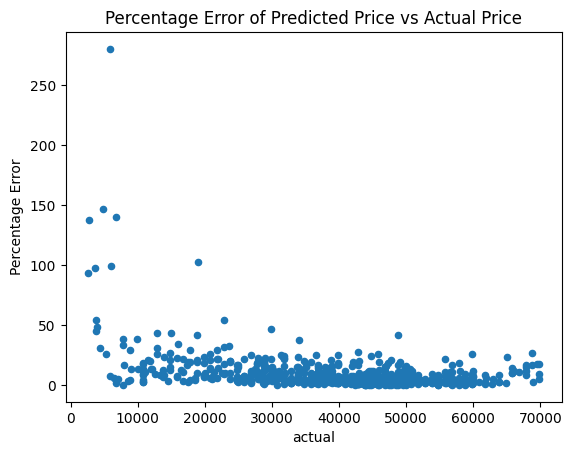

In [ ]:
def visualize_errors(X_test, y_test, predictions, x_axis_variable,label="AE"):
    '''For label paramter, either "AE"/"PE" '''
    X_test['actual'] = y_test.tolist()  # is this line also to be affected by x_axis_variable? nope, x variable just allows you change the factor that you think may affect the error
    X_test = X_test.assign(predicted=predictions)
    print(X_test.head())
    X_test['AE'] = abs((X_test['predicted'] - X_test['actual']))
    X_test['PE'] = abs((X_test['actual'] - X_test['predicted']) / X_test['actual']*100)
    if label=="AE":
      ylabel="Absolute Error"
      title="Absolute Error of Predicted Price vs Actual Price"
    elif label=="PE":
      ylabel="Percentage Error"
      title="Percentage Error of Predicted Price vs Actual Price"
    else:
      raise Exception("Invalid Input for label paramter")
    X_test.plot(x=x_axis_variable, y=label, kind='scatter')
    plt.ylabel(ylabel)
    plt.title(title)

visualize_errors(X_test, y_test, best_XGBR_model.predict(X_test), 'actual',"PE")